<a href="https://colab.research.google.com/github/arriagajorge/eval-selc-models/blob/main/Tarea3_SML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notas tecnicas

## Clonar un repositorio

Vamos a clonar un reositorio de github donde se encuentra el csv para trabjar con los datos, la siguiente línea de código es la que hace esta instrucción

In [ ]:
!git clone https://github.com/arriagajorge/eval-selc-models

Cloning into 'eval-selc-models'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), done.


## Cargar *R*

In [ ]:
%load_ext rpy2.ipython

## Cargar csv

In [ ]:
%%R
diab <- read.csv("/content/eval-selc-models/diabetes.csv")

## Guardar una imágen permanentemente

In [ ]:
%%R
# idicamos el formato (PDF, SVG, PNG,...)
pdf("my_plot.pdf")

# Customizing the output
#pdf("my_plot.pdf",         # File name
#    width = 4, height = 4, # Width and height in inches
#    bg = "white",          # Background color
#    colormodel = "cmyk")   # Color model (cmyk is required for most publications)

# hacemos la gráfica
x <- 1:100
y <- 3+x + rnorm(100)
plot(x,y)

dev.off()

png 
  2 


## Algunas librerias

In [ ]:
%%R
install.packages("boot")
library(boot)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/boot_1.3-28.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 236842 bytes (231 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

In [ ]:
%%R
library(ggplot2)

In [ ]:
%%R
install.packages("latex2exp")
library(latex2exp)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/latex2exp_0.9.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1605070 bytes (1.5 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

# Ejercicios

## Ejercicio 1

Ejercicio trabajado en el cap 10 de $\textit{Computer Age Statistical Inference}$ y base de datos en (1). Considere la base de datos $\textit{Student score data,}$ que consiste de 5 calificaciones de 22 alumnos. La matriz de correlación de estas mediciones aparece en la Tabla 10.1, p. 162, del libro $ \textit{CASI} $. Considere los dos parámetros, la correlación lineal entre las variables álgebra y estadística y la razón entre el eigenvalor mayor y  la suma se los cuatro eigenvalores.
$$\theta = cor(X_{\text{algebra}}, X_{\text{estadística}}), \quad \gamma = \lambda_1 / \sum_{i = 1}^{5}\lambda_i.$$
Para cada uno de los dos parámetros realice lo siguiente.

### a) Calcule la matriz de correlación muestral a partir de las observaciones y reporte el valor muestral de los dos parámetros, considerados como los valores estimados $\widehat{\theta}$ y $\widehat{\gamma}$.

**Solución/Explicación**

### b) Sin utilizar ningún paquete, calcule IC's por bootstrap, el naive y el de los cuantiles de la distribución acumulada empírica.

**Solución/Explicación**

### c) Utilice algún paquete de cómputo y calculo otros tipo de IC adicionales.

**Solución/Explicación**

### d) Para fines comparativos, presente el valor de los IC obtenidos, al 95\%, de forma tabular, y acompáñelos con una gráfica. Utilice mínimo $B = 2000$ repeticiones. Comente sobre características observadas de cada tipo de intervalo.

**Solución/Explicación**

In [ ]:
%%R
#data alumnos
student_score <- read.csv("/content/eval-selc-models/student_score.csv")
str(student_score)


matcorr <- cor(student_score)
rownames(matcorr) <- colnames(matcorr)
matcorr

# estimación \theta, corelación álgebra, estadística
theta_est <- matcorr["alg","stat"] # 0.6698

# estimacion de \gamma, \lambda_1/sum \lambda_i
eig_vals <- prcomp(student_score)$sdev^2
gamma_est <- eig_vals[1]/sum(eig_vals) #0.6993

# Bootstrap
set.seed(1) # semilla
n = length(student_score$mech)

# Bootstrap con distintas repeticiones
B = 200
boot.200 <- replicate(B, cor(student_score[sample(1:n, n,replace = T),])["alg","stat"])
B = 500
boot.500 <- replicate(B, cor(student_score[sample(1:n, n,replace = T),])["alg","stat"])
B = 1000
boot.1k <- replicate(B, cor(student_score[sample(1:n, n,replace = T),])["alg","stat"])
B = 2000
boot.2k <- replicate(B, cor(student_score[sample(1:n, n,replace = T),])["alg","stat"])
B = 5000
boot.5k <- replicate(B, cor(student_score[sample(1:n, n,replace = T),])["alg","stat"])
B = 10000
boot.10k <- replicate(B, cor(student_score[sample(1:n, n,replace = T),])["alg","stat"])

# Resumen de resultados
mean(boot.200); mean(boot.500); mean(boot.1k); mean(boot.2k); mean(boot.10k)
sd(boot.200); sd(boot.500); sd(boot.1k); sd(boot.5k); sd(boot.10k);
theta_est

# función que estima gamma
estim_gamma <- function(){
  eig_vals <- prcomp(student_score[sample(1:n, n,replace = T),])$sdev^2
  returnValue(eig_vals[1]/sum(eig_vals))
}
# Bootstrap con distintas repeticiones
B = 200
bootgamma.200 <- replicate(B, estim_gamma())
B = 500
bootgamma.500 <- replicate(B, estim_gamma())
B = 1000
bootgamma.1k <- replicate(B, estim_gamma())
B = 2000
bootgamma.2k <- replicate(B, estim_gamma())
B = 5000
bootgamma.5k <- replicate(B, estim_gamma())
B = 1000
bootgamma.10k <- replicate(B, estim_gamma()) #aqui ya tarda unos segundo

# resumen de resultados
mean(bootgamma.200); mean(bootgamma.500); mean(bootgamma.1k); mean(bootgamma.2k); mean(bootgamma.5k); mean(bootgamma.10k); 
sd(bootgamma.200); sd(bootgamma.500); sd(bootgamma.1k); sd(bootgamma.2k); sd(bootgamma.5k); sd(bootgamma.10k) 
gamma_est
# Trabajaremos con B=5000

# Intervalos para theta
# * Naive
low.basic.theta <- 2*theta_est - as.numeric(quantile(boot.5k, 0.975))
upp.basic.theta <- 2*theta_est - as.numeric(quantile(boot.5k, 0.025))
low.basic.theta; upp.basic.theta
# *Norm
# low_norm.theta <- theta_est-qnorm(0.975)*sd(boot.5k)
# upp_norm.theta <- theta_est+qnorm(0.975)*sd(boot.5k)
# low_norm.theta ; upp_naive.theta
# * Cuantiles
low_qua.theta <- as.numeric(quantile(boot.5k, 0.025))
upp_qua.theta <- as.numeric(quantile(boot.5k, 0.975))
low_qua.theta; upp_qua.theta
# longitud
upp_qua.theta-low_qua.theta; upp.basic.theta-low.basic.theta

# * library boot
thetaLboot.5k <- boot(student_score, function(x,samp) cor(x[samp,])["stat","alg"], R=5000)
ic_theta <- boot.ci(thetaLboot.5k, conf=0.95,
        type=c("norm","basic", "perc", "bca"))
ic_theta 

# Intervalos para gamma
# *Normal
# low_norm.gamma <- gamma_est-qnorm(0.975)*sd(bootgamma.5k) 
# upp_norm.gamma <- gamma_est+qnorm(0.975)*sd(bootgamma.5k)
# low_norm.gamma; upp_norm.gamma
# * Naive/Basic
basic.gamma.low <- 2*gamma_est-as.numeric(quantile(bootgamma.5k, 0.975))
basic.gamma.upp <- 2*gamma_est-as.numeric(quantile(bootgamma.5k, 0.025))
basic.gamma.low; basic.gamma.upp
# * Cuantiles
low_qua.gamma <- as.numeric(quantile(bootgamma.5k, 0.025))
upp_qua.gamma <- as.numeric(quantile(bootgamma.5k, 0.975))
low_qua.gamma; upp_qua.gamma
# longitud
upp_qua.gamma-low_qua.gamma; basic.gamma.upp - basic.gamma.low
# *libraty boot
f.estim_gamma <- function(data, samp){
  d<-data[samp,]
  eig_vals <- prcomp(d)$sdev^2
  returnValue(eig_vals[1]/sum(eig_vals))
}
gammaLboot <- boot(student_score,f.estim_gamma,R=5000)
ic_gamma <- boot.ci(gammaLboot, conf=0.95,
                    type=c("norm","basic", "perc", "bca"))
ic_gamma

'data.frame':	22 obs. of  5 variables:
 $ mech : int  7 44 49 59 34 46 0 32 49 52 ...
 $ vecs : int  51 69 41 70 42 40 40 45 57 64 ...
 $ alg  : int  43 53 61 68 50 47 21 49 47 60 ...
 $ analy: int  17 53 49 62 47 29 9 57 39 63 ...
 $ stat : int  22 53 64 56 29 17 14 64 26 54 ...
BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 5000 bootstrap replicates

CALL : 
boot.ci(boot.out = gammaLboot, conf = 0.95, type = c("norm", 
    "basic", "perc", "bca"))

Intervals : 
Level      Normal              Basic         
95%   ( 0.5420,  0.8588 )   ( 0.5590,  0.8750 )  

Level     Percentile            BCa          
95%   ( 0.5237,  0.8397 )   ( 0.5269,  0.8421 )  
Calculations and Intervals on Original Scale


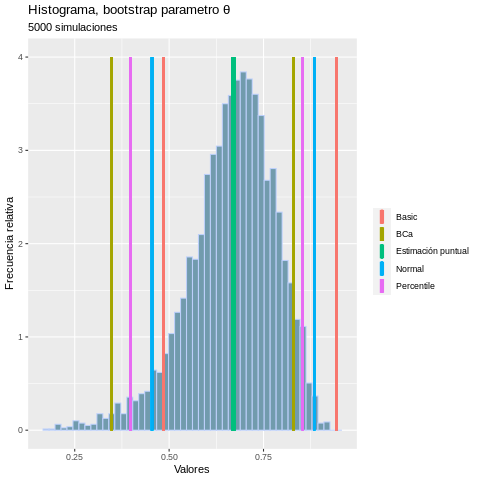

In [ ]:
%%R 
ic_theta
df_theta <-data.frame(boot.5k)
p1 <- ggplot(data = df_theta, aes(x=boot.5k)) +
  geom_histogram(aes(y=stat(density)), bins = 50, fill="#719BAD", color="#BCCFFA") +
  geom_linerange(aes(upp.basic.theta, ymin = 0, ymax=4,
                     color="Basic"), size=1) +
  geom_linerange(aes(low.basic.theta, ymin = 0, ymax=4,
                     color="Basic"), size=1) +
  geom_linerange(aes(upp_qua.theta, ymin = 0, ymax=4,
                     color="Percentile"), size=1) +
  geom_linerange(aes(low_qua.theta, ymin = 0, ymax=4,
                     color="Percentile"), size=1) +
  geom_linerange(aes(0.4547, ymin = 0, ymax=4,
                     color="Normal"), size=1) +
  geom_linerange(aes(0.8839, ymin = 0, ymax=4,
                     color="Normal"), size=1) +
  geom_linerange(aes(0.3483, ymin = 0, ymax=4,
                     color="BCa"), size=1) +
  geom_linerange(aes(0.8304, ymin = 0, ymax=4,
                     color="BCa"), size=1) +
  geom_linerange(aes(theta_est, ymin = 0, ymax=4,
                     color="Estimación puntual"), size=2) +
  labs(x="Valores", y="Frecuencia relativa",
       title="Histograma, bootstrap parametro θ", subtitle =
         "5000 simulaciones", color="")
p1

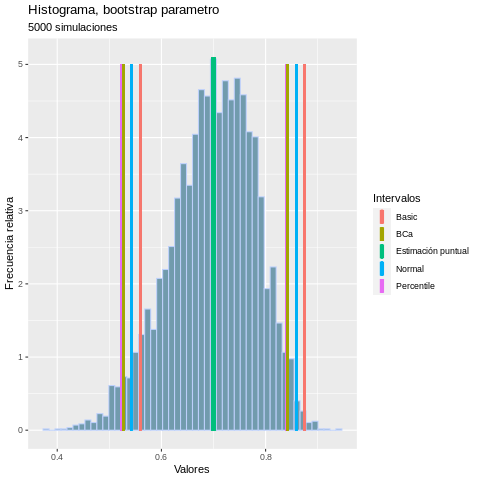

In [ ]:
%%R
# gamma
ic_gamma
df_gamma <- data.frame(bootgamma.5k)
p2 <- ggplot(data = df_gamma, aes(x=bootgamma.5k)) +
  geom_histogram(aes(y=stat(density)), bins = 50, fill="#719BAD", color="#BCCFFA") +
  geom_linerange(aes(basic.gamma.low, ymin = 0, ymax=5,
                     color="Basic"), size=1) +
  geom_linerange(aes(basic.gamma.upp, ymin = 0, ymax=5,
                     color="Basic"), size=1) +
  geom_linerange(aes(upp_qua.gamma, ymin = 0, ymax=5,
                     color="Percentile"), size=1) +
  geom_linerange(aes(low_qua.gamma, ymin = 0, ymax=5,
                     color="Percentile"), size=1) +
  geom_linerange(aes(0.542, ymin = 0, ymax=5,
                     color="Normal"), size=1) +
  geom_linerange(aes(0.8588, ymin = 0, ymax=5,
                     color="Normal"), size=1) +
  geom_linerange(aes(0.5269, ymin = 0, ymax=5,
                     color="BCa"), size=1) +
  geom_linerange(aes(0.8421, ymin = 0, ymax=5,
                     color="BCa"), size=1) +
  geom_linerange(aes(gamma_est, ymin = 0, ymax=5.1,
                     color="Estimación puntual"), size=2) +
  labs(x="Valores", y="Frecuencia relativa",
       title="Histograma, bootstrap parametro", subtitle =
         "5000 simulaciones", color="Intervalos")
p2


## Ejercicio 2

Ejercicio trabajado en $\textit{The Automatic Construction of Bootstrap Confidence Intervals}$, Efron \& Narasimhan, 2020, JCGS $\texttt{JCGS https://doi.org/10.1080/10618600.2020.1714633.} $ Considere esta base de datos $\textit{diabetes}$, de 442 observaciones y 11 variables y la regresión como aparece en la p.609 del artículo mencionado. Considere el coeficiente de determinación múltiple ajustado, como en el artículo,
$$\widehat{R}^{2}_{adj} = \widehat{R}^2 - (1-\widehat{R}^2)p/(n-p-1).$$

### a) Calcule el IC al 95\% por bootstrap con diversos métodos. Puede utilizar un paquete si desea, incluya algún o algunos histogramas de los $B$ valores calculados. Presente los IC de forma tabular.

In [ ]:
%%R
# data
diab <- read.csv("/content/eval-selc-models/diabetes.csv")[,-1]

dim(diab)
colnames(diab)
# These data consist of observations on 442 patients, with the response of interest being a quantitative measure of disease progression one year after baseline: prog
# There are ten baseline variables---age, sex, body-mass index, average blood pressure, and six blood serum measurements.
model <- lm(prog ~ ., data=diab)
est_r2.adj <- summary(model)$adj.r.squared
class(est_r2.adj)

set.seed(1)
f.est_r2.adj <- function(data,samp){
  d <- data[samp,]
  return(summary(lm(prog ~ ., data=d))$adj.r.squared)
}

boot_r2.adj.200 <- boot(diab,f.est_r2.adj, R=200)
boot_r2.adj.500 <- boot(diab,f.est_r2.adj, R=500)
boot_r2.adj.1k <- boot(diab,f.est_r2.adj, R=1000)
boot_r2.adj.2k <- boot(diab,f.est_r2.adj, R=2000)
boot_r2.adj.5k <- boot(diab,f.est_r2.adj, R=5000)
mean(boot_r2.adj.200$t); mean(boot_r2.adj.500$t); mean(boot_r2.adj.1k$t); mean(boot_r2.adj.2k$t); mean(boot_r2.adj.5k$t)
sd(boot_r2.adj.200$t); sd(boot_r2.adj.500$t); sd(boot_r2.adj.1k$t); sd(boot_r2.adj.2k$t); sd(boot_r2.adj.5k$t)

ci_r2.adj <-  boot.ci(boot_r2.adj.5k, conf=0.95,
        type=c("norm","basic", "perc", "bca"))
ci_r2.adj

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 5000 bootstrap replicates

CALL : 
boot.ci(boot.out = boot_r2.adj.5k, conf = 0.95, type = c("norm", 
    "basic", "perc", "bca"))

Intervals : 
Level      Normal              Basic         
95%   ( 0.4348,  0.5578 )   ( 0.4371,  0.5593 )  

Level     Percentile            BCa          
95%   ( 0.4538,  0.5760 )   ( 0.4306,  0.5569 )  
Calculations and Intervals on Original Scale


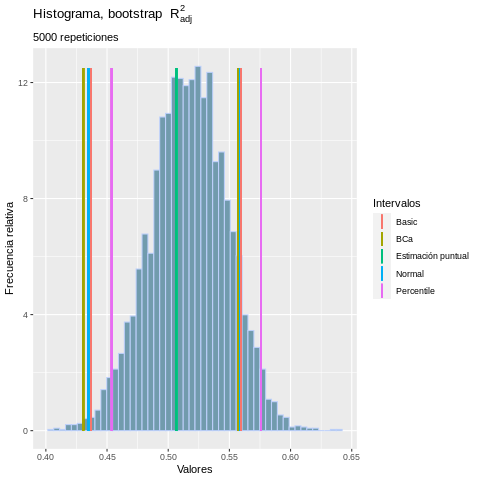

In [ ]:
%%R
# Histograma
df_r2.adj <- data.frame(boot_r2.adj.5k$t)
colnames(df_r2.adj)
p3 <- ggplot(data = df_r2.adj, aes(x=boot_r2.adj.5k.t)) +
  geom_histogram(aes(y=stat(density)), bins = 50, fill="#719BAD", color="#BCCFFA") +
  geom_linerange(aes(0.4371, ymin = 0, ymax=12.5,
                     color="Basic"), size=0.7) +
  geom_linerange(aes(0.5593, ymin = 0, ymax=12.5,
                     color="Basic"), size=0.7) +
  geom_linerange(aes(0.4538, ymin = 0, ymax=12.5,
                     color="Percentile"), size=0.7) +
  geom_linerange(aes(0.5760, ymin = 0, ymax=12.5,
                     color="Percentile"), size=0.7) +
  geom_linerange(aes(0.4348, ymin = 0, ymax=12.5,
                     color="Normal"), size=0.7) +
  geom_linerange(aes(0.5578, ymin = 0, ymax=12.5,
                     color="Normal"), size=0.7) +
  geom_linerange(aes(0.4306, ymin = 0, ymax=12.5,
                     color="BCa"), size=0.7) +
  geom_linerange(aes(0.5569, ymin = 0, ymax=12.5,
                     color="BCa"), size=0.7) +
  geom_linerange(aes(est_r2.adj, ymin = 0, ymax=12.5,
                     color="Estimación puntual"), size=0.8) +
  labs(x="Valores", y="Frecuencia relativa",
       title=TeX("Histograma, bootstrap  $\\R^2_{adj}$"), subtitle =
         "5000 repeticiones", color="Intervalos")
  
p3

**Solución/Explicación**

### b) Calcule IC al 95\% por $\textit{cross-validation}$ con al menos tres valores diferentes de $k$. Preséntelos de forma tabular.

In [ ]:
%%R
# Code
### b)
# B=1
no <- dim(diab)[1]
set.seed(1)

crossVal_r2.adj <- function(k){
  folds <- sample(cut(1:no, breaks = k, labels = F), no)
  est_ <- sapply(1:k, function(i) summary(lm(prog ~ ., data=diab[folds!=i,]))$adj.r.squared)
  test_ <- sapply(1:k, function(i) summary(lm(prog ~ ., data=diab[folds==i,]))$adj.r.squared)
  return(mean((est_ - test_)^2))
}

crossVal.est <- function(k){
  folds <- sample(cut(1:no, breaks = k, labels = F), no)
  return(sapply(1:k, function(i) summary(lm(prog ~ ., data=diab[folds!=i,]))$adj.r.squared))
}

crossVal_kB <- function(k, B=20){
  return(as.numeric(replicate(B, crossVal.est(k))))
}

CV.k3.B200 <- crossVal_kB(3,200)
CV.k4.B200 <- crossVal_kB(4,200)
CV.k5.B200 <- crossVal_kB(5,200)
CV.k10.B200 <- crossVal_kB(10,200)
LOO <- crossVal_kB(no,1)

  quantile(CV.k3.B200, c(0.025, 0.975))
  quantile(CV.k4.B200, c(0.025, 0.975))
  quantile(CV.k5.B200, c(0.025, 0.975))
  quantile(CV.k10.B200, c(0.025, 0.975))
  quantile(LOO, c(0.025, 0.975))

     2.5%     97.5% 
0.5038532 0.5104687 


**Solución/Explicación**

### c) Calcule un IC utilizando el método $\textit{repeated training/test}$ también conocido como $\textit{validation set approach}$. Preséntelos de forma tabular.

In [ ]:
%%R
# Code
# validation set approach
set.seed(1)
val.set.apr <- function(prop, B){
  return(replicate(B, summary(lm(prog ~ ., data=diab[sample(1:no, round(prop*no)),]))$adj.r.squared))
}
vsa.9.200  <- val.set.apr(0.9, 200)
vsa.9.500  <- val.set.apr(0.9, 500)
vsa.9.2000  <- val.set.apr(0.9, 2000)

vsa.75.200  <- val.set.apr(0.75, 200)
vsa.75.500  <- val.set.apr(0.75, 500)
vsa.75.2000  <- val.set.apr(0.75, 2000)

vsa.6.200  <- val.set.apr(0.5, 200)
vsa.6.500  <- val.set.apr(0.5, 500)
vsa.6.2000  <- val.set.apr(0.5, 2000)

mean(vsa.9.200); mean(vsa.9.500); mean(vsa.9.2000); 
mean(vsa.75.200); mean(vsa.75.500); mean(vsa.75.2000); 
mean(vsa.6.200); mean(vsa.6.500); mean(vsa.6.2000);

sd(vsa.9.200); sd(vsa.9.500); sd(vsa.9.2000); 
sd(vsa.75.200); sd(vsa.75.500); sd(vsa.75.2000); 
sd(vsa.6.200); sd(vsa.6.500); sd(vsa.6.2000);

quantile(vsa.9.200, c(0.025, 0.975)); quantile(vsa.9.500, c(0.025, 0.975)); quantile(vsa.9.2000, c(0.025, 0.975)); 
quantile(vsa.75.200, c(0.025, 0.975)); quantile(vsa.75.500, c(0.025, 0.975)); quantile(vsa.75.2000, c(0.025, 0.975)); 
quantile(vsa.6.200, c(0.025, 0.975)); quantile(vsa.6.500, c(0.025, 0.975)); quantile(vsa.6.2000, c(0.025, 0.975)); 


     2.5%     97.5% 
0.4389532 0.5689494 


**Solución/Explicación**

### d) Presente una gráfica con los diversos métodos y comente sobre las características de los diversos IC. ¿Cuál de éstod eligiría para esta base de datos?


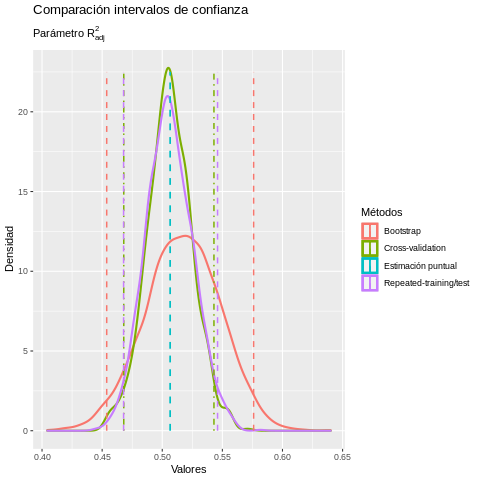

In [ ]:
%%R
# Code

ggplot(data = NULL) +
  geom_density(aes(x=boot_r2.adj.5k$t, color="Bootstrap"), size=1) +
  geom_density(aes(x=CV.k4.B200, color="Cross-validation"), size=1) + 
  geom_density(aes(x=vsa.75.2000, color="Repeated-training/test"), size=1) +
  geom_linerange(aes(0.4538, ymin = 0, ymax=22.5,
                     color="Bootstrap"), size=0.7, linetype = "dashed") +
  geom_linerange(aes(0.5760, ymin = 0, ymax=22.5,
                     color="Bootstrap"), size=0.7, linetype = "dashed") +
  geom_linerange(aes(0.4679877, ymin = 0, ymax=22.5,
                     color="Cross-validation"), size=0.7, linetype = "dotdash") +
  geom_linerange(aes(0.543, ymin = 0, ymax=22.5,
                     color="Cross-validation"), size=0.7, linetype = "dotdash") + 
  geom_linerange(aes(0.4678404, ymin = 0, ymax=22.5,
                     color="Repeated-training/test"), size=0.7, linetype = "dashed") +
  geom_linerange(aes(0.546, ymin = 0, ymax=22.5,
                     color="Repeated-training/test"), size=0.7, linetype = "dashed") +
  geom_linerange(aes(est_r2.adj, ymin = 0, ymax=22.5,
                     color="Estimación puntual"), size=0.8, linetype = "dashed") +
  labs(x="Valores", y="Densidad",
       title=TeX("Comparación intervalos de confianza"), subtitle =
         TeX("Parámetro $\\R^2_{adj}$"), color="Métodos")
  

**Solución/Explicación**

## Ejercicio 3

Considere nuevamente la base de datos del ejercicio 2, el modelo de regresión lineal, y el error de predicción estimado o error de prueba calculado como el promedio de los residuos elevados al cuadrado.


### a) Reporte el error de predicción aparente o por resubstitución.

In [ ]:
%%R 
# csv
diab <- read.csv("/content/eval-selc-models/diabetes.csv")[,-1]

In [ ]:
%%R
# Code
model <- lm(prog ~ ., data=diab)
summary(model) #Residual Standar Error 54.15 con (54.15)^2=2932.22
#Error aparente es:
#(54.15)^2*(442-11)/442=2859.24 o bien:
diab.glm<-glm(prog~.,data=diab)
mean(diab.glm$residuals^2) 

[1] 2859.69


**Solución/Explicación**

### b) Estime el error de predicción por $\textit{k-fold cross-validation}$. Experimente por lo menos tres valores diferentes de $k$ y $B > 100$ repeticiones. Compárelo con el error de entrenamiento, i.e. la suma de residuos el cuadradro obtenidos con el modelo ajustado con todas las observaciones. Comente sobre los resultados obtenidos.

In [ ]:
%%R
# Code
#K=3
set.seed(1052)
B=300
diab.err.cv3=matrix(NA, ncol=2, nrow=B) 
colnames(diab.err.cv3)=list("err", "adj_err")

for(i in 1:B){
  diab.err.cv3[i,]=(cv.glm(diab,diab.glm,K=3))$delta
}
diab.err.cv3.av=apply(diab.err.cv3, 2, mean)#estimate pred. error 3001.845

#K=5
set.seed(1052)
B=300
diab.err.cv5=matrix(NA, ncol=2, nrow=B) 
colnames(diab.err.cv5)=list("err", "adj_err")

for(i in 1:B){
  diab.err.cv5[i,]=(cv.glm(diab,diab.glm,K=5))$delta
}
diab.err.cv5.av=apply(diab.err.cv5, 2, mean)#estimate pred. error 3003.189

#K=10
set.seed(1052)
B=300
diab.err.cv10=matrix(NA, ncol=2, nrow=B) 
colnames(diab.err.cv10)=list("err", "adj_err")

for(i in 1:B){
  diab.err.cv10[i,]=(cv.glm(diab,diab.glm,K=10))$delta
}
diab.err.cv10.av=apply(diab.err.cv10, 2, mean)#estimate pred. error 3002.252

In [ ]:
%%R
head(diab.err.cv5)

          err  adj_err
[1,] 3063.831 3040.426
[2,] 3063.354 3040.430
[3,] 3021.419 3003.185
[4,] 2981.966 2968.238
[5,] 3006.549 2989.880
[6,] 3025.771 3006.973


In [ ]:
%%R
print(diab.err.cv3.av)
print(diab.err.cv5.av)
print(diab.err.cv10.av)

     err  adj_err 
3038.263 3001.845 
     err  adj_err 
3021.500 3003.189 
     err  adj_err 
3010.313 3002.252 


**Solución/Explicación**